In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

In [4]:
worksheet1 = "shift-data.xlsx"
worksheet2 = "third-shift-data.xlsx"

In [5]:
df1 = pd.read_excel(worksheet1, sheet_name ='first')
df2 = pd.read_excel(worksheet1, sheet_name = 'second')
df3 = pd.read_excel(worksheet2) 

In [12]:
print(df1,df2,df3)

    Shift  Clock Number      Name    Product  Production Run Time (Min)  \
0       1        123654      Pete  Pepperoni                         46   
1       1        123498     Abdul     Cheese                         56   
2       1        123999      Emma   Mushroom                         42   
3       1        123654      Pete  Pepperoni                         47   
4       1        123498     Abdul   Mushroom                         54   
5       1        123865  Mohammed     Cheese                         55   
6       1        123999      Emma     Cheese                         54   
7       1        123654      Pete    Sausage                         29   
8       1        123865  Mohammed  Pepperoni                         36   
9       1        123999      Emma   Mushroom                         44   
10      1        123498     Abdul     Cheese                         40   
11      1        123654      Pete    Sausage                         38   
12      1        123654  

#Join all the tables together 

In [13]:
df_all = pd.concat([df1,df2,df3])

In [14]:
print(df_all)

    Shift  Clock Number       Name    Product  Production Run Time (Min)  \
0       1        123654       Pete  Pepperoni                         46   
1       1        123498      Abdul     Cheese                         56   
2       1        123999       Emma   Mushroom                         42   
3       1        123654       Pete  Pepperoni                         47   
4       1        123498      Abdul   Mushroom                         54   
..    ...           ...        ...        ...                        ...   
24      3        322488  Gabrielle   Mushroom                         42   
25      3        322486       Omar   Mushroom                         43   
26      3        322976      Chuck     Cheese                         47   
27      3        322488  Gabrielle    Sausage                         45   
28      3        322976      Chuck  Pepperoni                         44   

    Products Produced (Units)  
0                         107  
1                      

Question: Which shift was the most productive in average for creating product?

We have to count and seperate "Shift" into group using groupby method ; we also take the average on them


In [8]:
whichShift = df_all.groupby(['Shift']).mean()

Now we want to calculate the productivity for each shift. 
As we can see below, shift 3 is the most productive

In [9]:
shift_productivity = whichShift.loc[:,"Production Run Time (Min)":"Products Produced (Units)"]
print(shift_productivity)

       Production Run Time (Min)  Products Produced (Units)
Shift                                                      
1                      44.689655                  54.482759
2                      43.689655                  80.103448
3                      43.034483                 128.448276


Use the data above to produce a graph

<AxesSubplot:xlabel='Shift'>

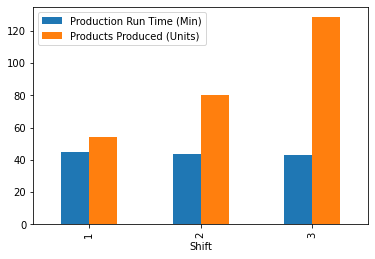

In [11]:
shift_productivity.plot(kind='bar')

To see which employee is the most productive

In [22]:
person = df_all.groupby(['Name']).sum()

In [28]:
whichPerson = person.loc[:,"Production Run Time (Min)":"Products Produced (Units)"].sort_values('Products Produced (Units)', ascending = False)
print(whichPerson)

           Production Run Time (Min)  Products Produced (Units)
Name                                                           
Chuck                            451                       1286
Sara                             285                        903
Gabrielle                        261                        777
Omar                             251                        759
Camila                           365                        600
Francesco                        310                        585
Emily                            285                        582
Pete                             287                        565
Oliver                           307                        556
Mohammed                         211                        343
Mike                             134                        198
Emma                             231                        177
Abdul                            247                        163
Sofie                            186    

<AxesSubplot:xlabel='Name'>

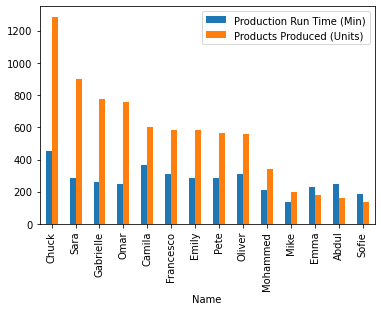

In [31]:
whichPerson.plot(kind='bar')

Question: Which product produced the most?

In [32]:
product = df_all.groupby(['Product']).sum()

In [33]:
whichProduct = product.loc[:,"Production Run Time (Min)":"Products Produced (Units)"].sort_values("Products Produced (Units)",ascending=False)

In [34]:
print(whichProduct)

           Production Run Time (Min)  Products Produced (Units)
Product                                                        
Pepperoni                        988                       2295
Cheese                          1110                       1941
Mushroom                         950                       1829
Sausage                          763                       1563


<AxesSubplot:xlabel='Product'>

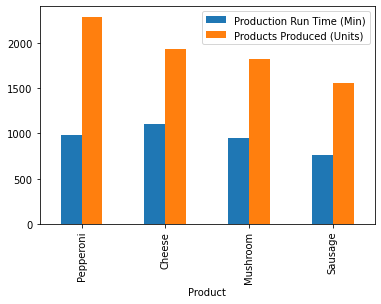

In [36]:
whichProduct.plot(kind='bar')